# Assignment \#7

### Import Libraries

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

### Import Data

#### Display current directory

In [2]:
os.getcwd()

'C:\\Users\\HaChoi\\School'

#### Access directory with the data files

In [3]:
path = os.chdir(r"C:\Users\HaChoi\School\CollegeScorecard_Raw_Data_01192021\Raw Data Files") 

#### Display list of files in the folder

In [4]:
files = os.listdir()

files

['Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv']

#### Only display the data files

In [5]:
csv_files = [file for file in files if "MERGED" in file]

csv_files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

#### Import all data files into a dataframe.

Only import the following columns:
- *UNITID* - Unit ID for institution
- *INSTNM* - Institution name
- *STABBR* - State postcode
- *REGION* - Institution's region
  - 0: U.S. Service Schools
  - 1: New England (CT, ME, MA, NH, RI, VT)
  - 2: Mid East (DE, DC, MD, NJ, NY, PA)
  - 3: Great Lakes (IL, IN, MI, OH, WI)
  - 4: Plains (IA, KS, MN, MO, NE, ND, SD)
  - 5: Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
  - 6: Southwest (AZ, NM, OK, TX)
  - 7: Rocky Mountains (CO, ID, MT, UT, WY)
  - 8: Far West (AK, CA, HI, NV, OR, WA)
  - 9: Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)
- *ADM_RATE* - Admission rate
- *TUITIONFEE_IN* - In-state tuition and fees
- *YEAR* - Admission year

In [6]:
raw_data = []

for file in csv_files:
    df = (pd.read_csv(file, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]))
    df['YEAR'] = file[6:10]
    raw_data.append(df)

all_data = pd.concat(raw_data)

all_data.shape

(163331, 7)

In [7]:
# display sample data

all_data.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1345,154378,Southeastern Community College,IA,4.0,NaN,4350.0,2013
1482,158334,Baton Rouge General Medical Center-School of R...,LA,5.0,NaN,NaN,2014
2511,179548,Stephens College,MO,4.0,0.8457,16245.0,2001
4559,409616,Roger Williams University School of Law,RI,1.0,NaN,NaN,2016
321,113980,El Camino Community College District,CA,8.0,NaN,1142.0,2013


### Cleanse Data

#### Create dictionary for Region

In [8]:
region_dict = {
    0: 'U.S. Service Schools',
    1: 'New England (CT, ME, MA, NH, RI, VT)',
    2: 'Mid East (DE, DC, MD, NJ, NY, PA)',
    3: 'Great Lakes (IL, IN, MI, OH, WI)',
    4: 'Plains (IA, KS, MN, MO, NE, ND, SD)',
    5: 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
    6: 'Southwest (AZ, NM, OK, TX)',
    7: 'Rocky Mountains (CO, ID, MT, UT, WY)',
    8: 'Far West (AK, CA, HI, NV, OR, WA)',
    9: 'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)'
}

#### Update the "Region" column with corresponding region

In [9]:
df = all_data.replace({'REGION': region_dict})

df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6561,457110,Carrington College-Reno,NV,"Far West (AK, CA, HI, NV, OR, WA)",1.0000,NaN,2013
858,135142,La Belle Beauty School,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2005
6286,447768,American Career College-Ontario,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2010
3171,203483,Kent State University at Tuscarawas,OH,"Great Lakes (IL, IN, MI, OH, WI)",NaN,4770.0,2008
1949,167057,The New England Conservatory of Music,MA,"New England (CT, ME, MA, NH, RI, VT)",0.3017,27500.0,2005


### Data exploration 

#### Find null values in each column

In [10]:
# display all rows with null values 

df.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118419
TUITIONFEE_IN     84136
YEAR                  0
dtype: int64

In [11]:
# display data with null region

df[df['REGION'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
7726,45712901,Chamberlain College of Nursing-Miramar Campus,FL,NaN,NaN,NaN,2011


In [12]:
# display data with null admission rate 

df[df['ADM_RATE'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,21420.0,2018


In [13]:
# display data with null in-state tuition

df[df['TUITIONFEE_IN'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
...,...,...,...,...,...,...,...
6787,48385001,Alliance Computing Solutions - NYC,NY,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,2018
6788,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018
6789,48400201,High Desert Medical College - Bakerfield,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018


In [14]:
# display dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  object 
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   YEAR           163331 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 7.5+ MB


In [15]:
# display first 5 rows

df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996


In [16]:
# display last 5 rows

df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018


In [17]:
# display random 5 rows

df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6803,418603,Clarion County Career Center Practical Nursing...,PA,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2601,184056,Lincoln Technical Institute-Iselin,NJ,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,11854.0,2003
3241,214290,New Castle School of Trades,PA,"Mid East (DE, DC, MD, NJ, NY, PA)",1.0,NaN,2015
4909,441104,Richmont Graduate University,TN,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2017
919,134228,Fort Pierce Beauty Academy,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1998


In [18]:
# display statistics for admission rate and in-state tuition columns

df[['ADM_RATE','TUITIONFEE_IN']].describe()

,ADM_RATE,TUITIONFEE_IN
count,44912.000000,79195.000000
mean,0.692951,11665.636871
std,0.217058,9986.003542
min,0.000000,0.000000
25%,0.555075,3776.000000
50%,0.717500,9285.000000
75%,0.857100,16148.000000
max,1.000000,74787.000000


### Create UMBC dataframe

In [19]:
# search for "UMBC"

df[df['INSTNM'] == 'UMBC']

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR


In [20]:
# find all universities with "Baltimore County" in the institution name

df[df['INSTNM'].str.contains('Baltimore County')].sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
5263,434672,Community College of Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,3712.0,2014
5865,434672,Community College of Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,2394.0,2006
6128,434672,Community College of Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,2626.0,2003
5970,434672,Community College of Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,2926.0,2004
1779,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6895,8708.0,2007


In [21]:
# Display only UMBC data based on university ID

umbc = df[df['UNITID'] == 163268]

umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7143,8520.0,2005


In [22]:
# number of UMBC records

print('Number of UMBC records:', umbc.shape[0])

Number of UMBC records: 23


#### Drop all rows with null values

In [23]:
# check for null values for UMBC data

umbc.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [24]:
# display data with null admission rate 

umbc[umbc['ADM_RATE'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000


In [25]:
# display data with null in-state tuition rate 

umbc[umbc['TUITIONFEE_IN'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999


In [26]:
# drop all records without in-state tuition fee

clean_umbc = umbc.dropna(subset=['TUITIONFEE_IN']).reset_index(drop = True)

clean_umbc.shape

(19, 7)

In [27]:
# display first 5 rows of UMBC data

clean_umbc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000
1,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6551,5910.0,2001
2,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002
3,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5757,7388.0,2003
4,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004


In [28]:
# display last 5 rows of UMBC data

clean_umbc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
14,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5961,10384.0,2014
15,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5942,11006.0,2015
16,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5683,11264.0,2016
17,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6021,11518.0,2017
18,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5794,11778.0,2018


In [29]:
# display random 5 rows of UMBC data

clean_umbc.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
4,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004
10,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6589,9171.0,2010
7,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6895,8708.0,2007
12,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6035,9764.0,2012
17,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6021,11518.0,2017


In [30]:
# display statistics for admission rate and in-state tuition for UMBC

clean_umbc[['ADM_RATE','TUITIONFEE_IN']].describe()

,ADM_RATE,TUITIONFEE_IN
count,18.000000,19.000000
mean,0.640694,9004.842105
std,0.052728,1825.795421
min,0.568300,5490.000000
25%,0.597600,8270.000000
50%,0.632100,8872.000000
75%,0.689375,10226.000000
max,0.717400,11778.000000


### Display UMBC data

#### Display UMBC's in-state tuition in a bar chart
- UMBC data between 1996 to 1999 were dropped because in-state tuition fees were null.

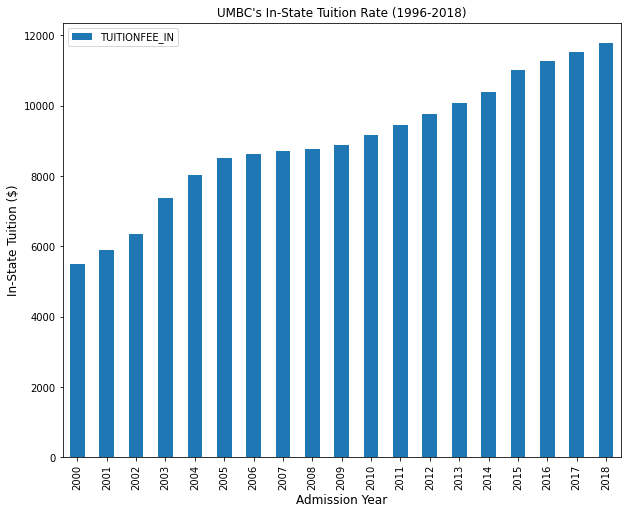

In [31]:
umbc_bar = clean_umbc.plot.bar(x = 'YEAR', y = 'TUITIONFEE_IN', figsize = (10,8))

plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)
plt.show()

#### Display UMBC's in-state tuition in a line chart

C:\Users\HaChoi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


ConversionError: Failed to convert value(s) to axis units: 0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
Name: YEAR, dtype: object

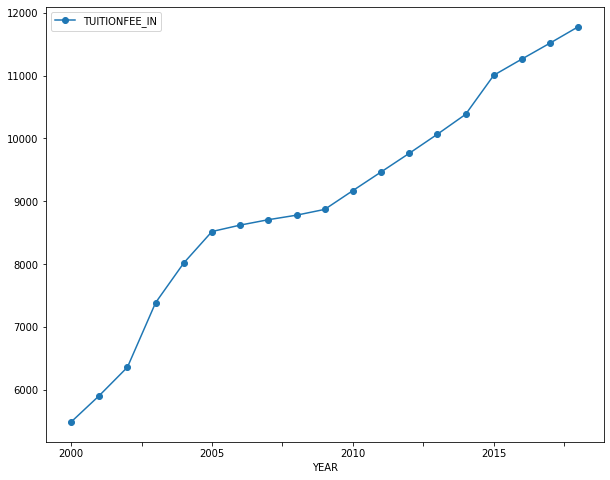

In [32]:
umbc_line = clean_umbc.plot.line('YEAR', 'TUITIONFEE_IN', marker = 'o', figsize = (10,8))

plt.xticks(clean_umbc['YEAR'], rotation = 90)
plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)
plt.show()

#### Calculate UMBC tuition change percentage per year

percentage of yearly tuition change = [(current year - last year) / last year] * 100 

In [ ]:
# convert TUITIONFEE_IN column into a list

umbc_tuition = clean_umbc['TUITIONFEE_IN'].tolist()

umbc_tuition

In [ ]:
# calculate the percentage of yearly change in tuition

umbc_change = []
umbc_change.append(0) # value for first year

for x in range(1, len(umbc_tuition)):
    umbc_last = umbc_tuition[x-1]
    umbc_current = umbc_tuition[x]
    umbc_percent = ((umbc_current - umbc_last) / umbc_last) * 100
    umbc_change.append(umbc_percent)
    
umbc_change

In [ ]:
# round up values to 2 decimal points

umbc_round = [round(i, 2) for i in umbc_change]

umbc_round

#### Add percentage of yearly change in tuition to the dataframe

In [ ]:
clean_umbc['PCT_CHANGE'] = umbc_round

clean_umbc

#### Display UMBC Tuition Change with Visualizations

In [ ]:
umbc_bar2 = clean_umbc.plot.bar(x = 'YEAR', y = 'PCT_CHANGE', figsize = (10,8))

plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Percent Changed in Tuition (%)", fontsize=12)

plt.show()

In [ ]:
umbc_line2 = clean_umbc.plot.line('YEAR', 'PCT_CHANGE', marker = 'o', figsize = (10,8))

plt.xticks(clean_umbc['YEAR'], rotation = 90)
plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Percent Changed in Tuition (%)", fontsize=12)
plt.show()

### Create function of yearly percentage change 

In [ ]:
def pct_change(x):
    tuition_change = []
    tuition_change.append(0) # value for first year

    for a in range(1, len(x)):
        last_tuition = x[a-1]
        current_tuition = x[a]
        percent_change = ((current_tuition - last_tuition) / last_tuition) * 100
        tuition_change.append(percent_change)
        tuition_round = [round(i, 2) for i in tuition_change]

    return tuition_round

### Create JHU Dataframe

In [ ]:
# search for JHU

df[df['INSTNM'] == 'JHU']

In [ ]:
# search for all univerities with 'Hopkins' in the name

df[df['INSTNM'].str.contains('Hopkins')]

In [ ]:
# display only JHU data based on university ID

jhu = df[df['UNITID'] == 162928]

jhu

In [ ]:
# number of jhu records

print('Number of JHU records:', jhu.shape[0])

#### Drop all rows with null values

In [ ]:
# check for null values for JHU data

jhu.isna().sum()

In [ ]:
# display data with null admission rate 

jhu[jhu['ADM_RATE'].isnull()]

In [ ]:
# display data with null in-state tuition rate 

jhu[jhu['TUITIONFEE_IN'].isnull()]

In [ ]:
# drop all records without admission rate 

clean_jhu = jhu.dropna(subset=['TUITIONFEE_IN']).reset_index(drop = True)

clean_jhu.shape

### Display JHU Data

#### Display a bar and line chart of the JHU's tuition
- JHU data between 1996 to 1999 were dropped because in-state tuition fees were null.


In [ ]:
plt.figure(figsize=(10,8))
plt.bar(clean_jhu['YEAR'], clean_jhu['TUITIONFEE_IN'], color = 'orange')
plt.plot(clean_jhu['YEAR'], clean_jhu['TUITIONFEE_IN'], '-o', color='green')

plt.xticks(clean_jhu['YEAR'], rotation = 90)
plt.title("JHU's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)

plt.show()

#### Calculate JHU tuition change percentage per year

In [ ]:
# convert TUITIONFEE_IN column into a list

jhu_tuition = clean_jhu['TUITIONFEE_IN'].tolist()

jhu_tuition

In [ ]:
# calculate the percentage of yearly change in tuition

jhu_round = pct_change(jhu_tuition)

jhu_round

#### Add percentage of yearly change in tuition to the dataframe

In [ ]:
clean_jhu['PCT_CHANGE'] = jhu_round

clean_jhu

### Display bar plot of JHU percentage changes tuition over the years

In [ ]:
fig = plt.figure(figsize=(10,8))

ax = clean_jhu['TUITIONFEE_IN'].plot(kind="bar", color = 'orange', label = 'Tuition')
ax2 = ax.twinx()
ax2.plot(clean_jhu['PCT_CHANGE'],marker='o', color = 'green', label = 'Percent Change')

ax.set_xticklabels(clean_jhu['YEAR'])

plt.title("JHU's In-State Tuition Rate (1996-2018)")
ax.set_xlabel("Admission Year", fontsize=12)
ax.set_ylabel('In-State Tuition ($)',  fontsize=12)
ax2.set_ylabel('Tutition Percentage Change (%)',  fontsize=12)
fig.legend(loc="upper right")

plt.show()

### Merge UMBC and JHU data

#### 1) Create UMBC dataframe with Year and PCT_CHANGE columns
- Rename PCT_CHANGE column to UMBC_PCT column

In [ ]:
umbc2 = clean_umbc[['YEAR', 'PCT_CHANGE']].copy().rename(columns={"PCT_CHANGE": "UMBC_PCT"})

umbc2

#### 2) Create JHU dataframe with Year and PCT_CHANGE columns
- Rename PCT_CHANGE column to JHU_PCT column

In [ ]:
jhu2 = clean_jhu[['YEAR', 'PCT_CHANGE']].copy().rename(columns={"PCT_CHANGE": "JHU_PCT"})

jhu2

#### 3) Merge UMBC and JHU dataframes

In [ ]:
merged_df = pd.merge(left = umbc2, right =jhu2, left_on = 'YEAR', right_on = 'YEAR')

merged_df

### Compare In-State Tuition of UMBC and JHU

In [ ]:
# plot both universities together - this does not work because the bars overlap

ax = plt.gca()

merged_df.plot(kind='bar', x = 'YEAR', y = 'UMBC_PCT', ax = ax)
merged_df.plot(kind='bar', x = 'YEAR', y = 'JHU_PCT', color ='orange', ax=ax)

In [ ]:
# display UMBC and JHU side by side on a bar chart 

merged_df.plot(x = 'YEAR', y = ['UMBC_PCT', 'JHU_PCT'], kind="bar", figsize = (10,8))

plt.title("UMBC vs. JHU Tuition Change Rate (2000-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Tutition Percentage Change (%)", fontsize=12)

In [ ]:
# display UMBC and JHU on multi-line line chart

merged_df.plot(x = "YEAR", y =["UMBC_PCT","JHU_PCT"], marker = 'o', figsize = (10,8))

plt.xticks(clean_jhu['YEAR'], rotation = 90)
plt.title("UMBC vs. JHU Tuition Change Rate (2000-2018)")
plt.xlabel("Admission Years", fontsize=12)
plt.ylabel("Tutition Percentage Change (%)", fontsize=12)

plt.show()

### Analysis

#### UMBC
- UMBC's tuition increased the most between 2002 - 2003, when the tuition increased by 16.13%.
- UMBC's tuition decreased the most between 2003 - 2004, when the tuition decreased by 8.55%

#### JHU 
- JHU's tuition increased the most between 2005 - 2006, when the tuition increased by 7.21%
- JHU's tuition decreased the most between 2006 - 2007, when the tuition decreased by 5.90%

#### Comparison
- The tuition was most volatile between 2000 - 2010. The percentages fluctuated more than between 2011 - 2018. 
- Starting 2010, the tuition percentage of increase steadily increased between 2% - 3% 